In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# Step 1: Load the data from folders
data_directory = r"C:\Users\erkme\OneDrive\Masaüstü\bitirme_proje_kodlar\data\Raw_data\Data\\30dB_TgnF"
classes = os.listdir(data_directory)

data = []
labels = []

for class_name in classes:
    class_folder = os.path.join(data_directory, class_name)
    files = os.listdir(class_folder)
    for file_name in files:
        # Load numpy array data
        array_data = np.load(os.path.join(class_folder, file_name))
        data.append(array_data.reshape(-1,2))
        labels.append(class_name)

In [3]:
data = np.array(data)
labels = np.array(labels)
print(type(data))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(labels.shape)
print(data.shape)

(40000,)
(40000, 240, 2)


Labeling Procedure for the Data Set

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Manually assign integer labels to the classes
label_encoder.fit(labels)

# Create a mapping between string labels and integer labels
label_mapping = {class_label: int(class_label.split('_')[1])-1 for class_label in label_encoder.classes_}

# Transform string labels to integer labels using the mapping
integer_labels = [label_mapping[string_label] for string_label in labels]

# Print the mapping between string labels and integer labels
print("Label Mapping:", label_mapping)

# Print the converted integer labels
print("Integer Labels:", integer_labels)

integer_labels = np.array(integer_labels)

Label Mapping: {'Wave_1': 0, 'Wave_2': 1, 'Wave_3': 2, 'Wave_4': 3, 'Wave_5': 4}
Integer Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Checking if the Labeling Procedure was Done Correctly.

In [6]:
x = 0
y = 0
z = 0
a = 0
b = 0

for i in integer_labels:
    if i == 0:
        x+=1
    if i == 1:
        y+=1
    if i == 2:
        z+=1  
    if i == 3:
        a+=1    
    if i == 4:
        b+=1      
print("number of 0 classes is:",x)
print("number of 1 classes is:",y)
print("number of 2 classes is:",z)
print("number of 3 classes is:",a)
print("number of 4 classes is:",b)

number of 0 classes is: 8000
number of 1 classes is: 8000
number of 2 classes is: 8000
number of 3 classes is: 8000
number of 4 classes is: 8000


In [7]:
print(data.shape)
print(integer_labels.shape)

(40000, 240, 2)
(40000,)


In [8]:
unique_labels = np.unique(integer_labels)
print(unique_labels)

[0 1 2 3 4]


Train, Validation Split (Test split also should be added)

In [9]:
# Step 3: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, integer_labels, test_size=0.2, random_state=42)

In [10]:
print(y_train.shape)

(32000,)


In [11]:
# Assuming 'index' is the index of the sample you want to retrieve the label for
index = 4 # any integer value: 0-4

for i in range(500):
    # Retrieve the label for the sample at the given index
    label = y_train[i]

    if label == index:
        print("Label for sample at index", i, ":", label)

Label for sample at index 15 : 4
Label for sample at index 20 : 4
Label for sample at index 21 : 4
Label for sample at index 23 : 4
Label for sample at index 33 : 4
Label for sample at index 45 : 4
Label for sample at index 50 : 4
Label for sample at index 51 : 4
Label for sample at index 66 : 4
Label for sample at index 68 : 4
Label for sample at index 72 : 4
Label for sample at index 78 : 4
Label for sample at index 81 : 4
Label for sample at index 89 : 4
Label for sample at index 103 : 4
Label for sample at index 105 : 4
Label for sample at index 108 : 4
Label for sample at index 109 : 4
Label for sample at index 119 : 4
Label for sample at index 124 : 4
Label for sample at index 127 : 4
Label for sample at index 147 : 4
Label for sample at index 150 : 4
Label for sample at index 152 : 4
Label for sample at index 155 : 4
Label for sample at index 165 : 4
Label for sample at index 172 : 4
Label for sample at index 173 : 4
Label for sample at index 180 : 4
Label for sample at index 18

Normalization of X_train set

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
I_X_train = X_train[:,:,0]
Q_X_train = X_train[:,:,1]
# Fit the scaler to the data and transform the data
minmax_normalized_i_data = scaler.fit_transform(I_X_train)
minmax_normalized_q_data = scaler.fit_transform(Q_X_train)

minmax_normalized_i_data = minmax_normalized_i_data.reshape(-1,240,1)
minmax_normalized_q_data = minmax_normalized_q_data.reshape(-1,240,1)

minmax_normalized_X_train = np.concatenate((minmax_normalized_i_data,minmax_normalized_q_data),axis=2)

# print(minmax_normalized_iq_data.shape)
# print(I_X_train.shape)
# print(Q_X_train.shape)

print("Original IQ data:\n", X_train)
print("Min-Max normalized IQ data:\n", minmax_normalized_X_train)

Original IQ data:
 [[[-1.64727527e-05 -3.86814473e-07]
  [-1.02698768e-04 -1.29208708e-05]
  [-6.05789471e-05 -9.72267800e-05]
  ...
  [-1.63562652e-03 -2.66348463e-03]
  [-2.19170015e-03 -1.59480663e-03]
  [-1.06985109e-03  9.36050341e-04]]

 [[ 4.58670291e-05  4.18669503e-07]
  [ 1.32334845e-04 -5.22345690e-06]
  [-7.80777426e-05  1.34509781e-04]
  ...
  [-1.73625111e-03  3.01151583e-04]
  [-1.32430628e-03  1.57088054e-03]
  [-6.02532457e-05 -1.15769593e-04]]

 [[ 7.08466791e-06  1.74278878e-05]
  [-3.57121114e-05 -5.12149225e-05]
  [-9.21552036e-06  3.55664911e-06]
  ...
  [-2.28405727e-03 -8.34811482e-04]
  [-1.54368417e-03  4.60598642e-04]
  [-3.88665377e-04  7.28305094e-04]]

 ...

 [[-3.69624051e-05 -5.42204002e-05]
  [-3.06425318e-05 -1.57184968e-05]
  [-2.56941576e-05  1.72894023e-05]
  ...
  [ 3.24201250e-03 -2.85857396e-03]
  [ 8.71432372e-05 -2.99040028e-03]
  [-3.44246504e-03 -4.22518459e-04]]

 [[-6.09196947e-05 -9.30961372e-05]
  [-3.09934584e-05  4.25431453e-05]
  [ 4.2

Normalization of X_val set

In [13]:
scaler = MinMaxScaler()
I_X_val = X_val[:,:,0]
Q_X_val = X_val[:,:,1]

# Fit the scaler to the data and transform the data
minmax_normalized_i_data = scaler.fit_transform(I_X_val)
minmax_normalized_q_data = scaler.fit_transform(Q_X_val)

minmax_normalized_i_data = minmax_normalized_i_data.reshape(-1,240,1)
minmax_normalized_q_data = minmax_normalized_q_data.reshape(-1,240,1)

minmax_normalized_X_val = np.concatenate((minmax_normalized_i_data,minmax_normalized_q_data),axis=2)

# print(minmax_normalized_iq_data.shape)
# print(I_X_train.shape)
# print(Q_X_train.shape)

print("Original IQ data:\n", X_val)
print("Min-Max normalized IQ data:\n", minmax_normalized_X_val)

Original IQ data:
 [[[ 1.89875406e-05  8.56236112e-06]
  [-1.95448615e-05 -6.75851676e-05]
  [ 1.13204412e-04 -1.36879013e-06]
  ...
  [-9.29841504e-04 -2.53380738e-04]
  [-1.60810770e-03  2.04736007e-03]
  [-1.22691936e-03  2.84192159e-03]]

 [[-2.99160214e-05  4.65610541e-05]
  [-5.26925026e-05  1.71709915e-05]
  [-5.25558647e-05 -5.09078730e-05]
  ...
  [-2.84253039e-03 -2.06262243e-03]
  [-2.83824866e-03  1.56819308e-03]
  [-4.58031518e-04  2.84623919e-03]]

 [[ 2.83926711e-05 -1.00047077e-05]
  [ 1.33644638e-05  2.73217097e-06]
  [ 2.63300237e-05 -2.12604893e-05]
  ...
  [ 8.66014786e-04  2.19498356e-03]
  [ 3.34800237e-04 -8.82023883e-04]
  [-1.57361427e-03 -2.21550943e-03]]

 ...

 [[-1.10304339e-04 -7.72454348e-05]
  [-2.66803968e-06 -4.12618336e-05]
  [-1.89239523e-05 -5.03270248e-05]
  ...
  [ 1.27766561e-03  8.96746294e-04]
  [ 2.87956385e-04 -8.23186630e-04]
  [-8.48084043e-04 -1.25576484e-03]]

 [[-1.61779262e-05 -4.24036697e-05]
  [ 3.71814997e-05  5.98869136e-05]
  [ 1.0

In [14]:
print(minmax_normalized_X_train.shape)
print(minmax_normalized_X_val.shape)

(32000, 240, 2)
(8000, 240, 2)


MODEL STRUCTURE

In [15]:
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l1, l2 
from tensorflow.keras.initializers import he_normal
from keras.utils.vis_utils import plot_model

Should be Change as Needed (maybe there is a overfitting issue or model fits poorly to our dataSet which results in bad metric results)

In [16]:
model = Sequential()

# Layer 1: Convolutional Layer (C1)
model.add(layers.Conv2D(16, kernel_size=(2, 1), strides=(1, 1), input_shape=(240,2,1), padding='same', kernel_regularizer=l2(0.01)))
model.add(layers.LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

# Layer 2: Average Pooling Layer (S2)
model.add(layers.AveragePooling2D(pool_size=(2, 1), strides=(2, 1), padding='valid'))

# Layer 3: Convolutional Layer (C3)
model.add(layers.Conv2D(32, kernel_size=(2, 1), strides=(1, 1), padding='valid',kernel_regularizer=l2(0.01)))
model.add(layers.LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

# Layer 4: Average Pooling Layer (S4)
model.add(layers.AveragePooling2D(pool_size=(2, 1), strides=(2, 1), padding='valid'))

# Layer 5: Fully Connected Layer (C5)
model.add(layers.Flatten())
model.add(layers.Dense(32, kernel_regularizer=l2(0.01)))
model.add(layers.LeakyReLU(alpha=0.01))
Dropout(0.5)

# Layer 6: Fully Connected Layer (F6)
model.add(layers.Dense(16, kernel_regularizer=l2(0.01)))
model.add(layers.LeakyReLU(alpha=0.01))
Dropout(0.5)

# Output Layer
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 2, 16)        48        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 240, 2, 16)        0         
                                                                 
 batch_normalization (BatchN  (None, 240, 2, 16)       64        
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 120, 2, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 2, 32)        1056      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 119, 2, 32)        0

In [18]:
print(X_val.shape)
print(y_val.shape)
print(unique_labels)

(8000, 240, 2)
(8000,)
[0 1 2 3 4]


In [19]:
print(X_train.shape)
print(y_train.shape)

(32000, 240, 2)
(32000,)


Fit the dataSet into our model and show Learning Curve Plot

Epoch 1/30
1000/1000 [==============================] - 10s 9ms/step - loss: 2.6855 - accuracy: 0.2192 - val_loss: 2.6603 - val_accuracy: 0.2222
Epoch 2/30
1000/1000 [==============================] - 8s 8ms/step - loss: 2.6378 - accuracy: 0.2352 - val_loss: 2.6165 - val_accuracy: 0.2330
Epoch 3/30
1000/1000 [==============================] - 7s 7ms/step - loss: 2.5945 - accuracy: 0.2455 - val_loss: 2.5739 - val_accuracy: 0.2418
Epoch 4/30
1000/1000 [==============================] - 7s 7ms/step - loss: 2.5534 - accuracy: 0.2573 - val_loss: 2.5357 - val_accuracy: 0.2495
Epoch 5/30
1000/1000 [==============================] - 8s 8ms/step - loss: 2.5143 - accuracy: 0.2616 - val_loss: 2.4967 - val_accuracy: 0.2539
Epoch 6/30
1000/1000 [==============================] - 9s 9ms/step - loss: 2.4769 - accuracy: 0.2652 - val_loss: 2.4595 - val_accuracy: 0.2586
Epoch 7/30
1000/1000 [==============================] - 7s 7ms/step - loss: 2.4410 - accuracy: 0.2699 - val_loss: 2.4246 - val_accuracy

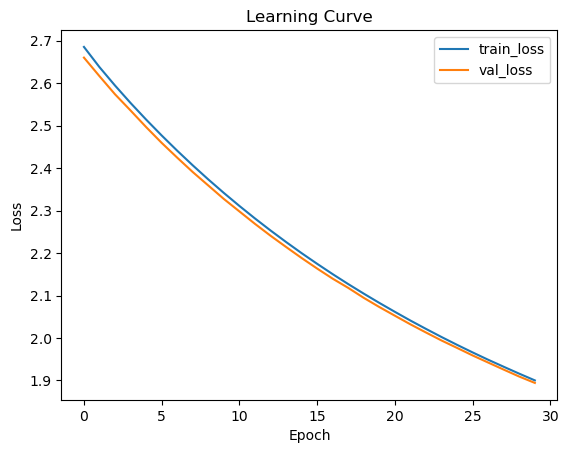

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model, save_model
import matplotlib.pyplot as plt

model.compile(optimizer=SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30, batch_size = 32, validation_data = (X_val, y_val), callbacks=[early_stopping])

# model.save("my_model.h1")
# model1 = load_model("my_model.h1")

# Plot learning curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Accuracy and Loss Plots

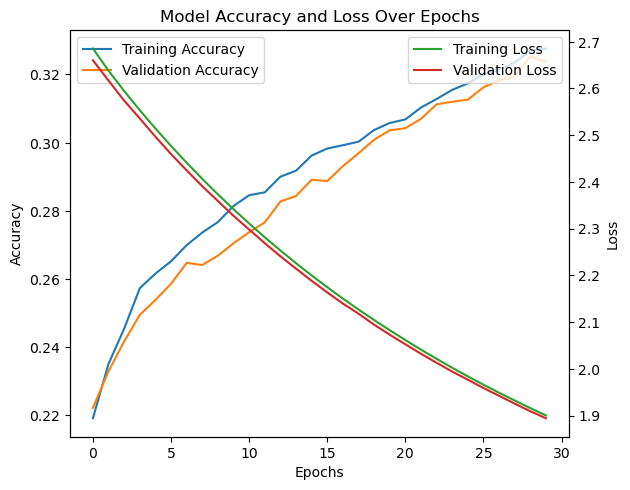

In [21]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='tab:blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='tab:orange')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Loss')  # we already handled the x-label with ax1
ax2.plot(history.history['loss'], label='Training Loss', color='tab:green')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='tab:red')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Model Accuracy and Loss Over Epochs')
plt.show()

Making predictions to check whether there is overfitting.

In [22]:
# Assuming you have already trained your model and have a test dataset (X_test)

# Make predictions on the test dataset
predictions = model.predict(X_val)

# Since you're using a softmax activation function in the output layer, predictions will be probabilities
# You can convert probabilities to class labels by selecting the class with the highest probability for each sample
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with true labels
correct_predictions = (predicted_labels == y_val)

# Calculate accuracy
accuracy = np.mean(correct_predictions)
print("Accuracy:", accuracy)

250/250 [==============================] - 1s 5ms/step
Accuracy: 0.32375


In [23]:
# Print distribution of predicted labels
unique, counts = np.unique(predicted_labels, return_counts=True)
print("Predicted label distribution:", dict(zip(unique, counts)))

Predicted label distribution: {0: 1588, 1: 1408, 2: 1664, 3: 2069, 4: 1271}


In [24]:
# Ensure y_val is in the correct shape and type
print("Shape of y_val:", y_val.shape)
print("Shape of predicted_labels:", predicted_labels.shape)

# Check a sample of predictions and true labels
print("Sample predictions:", predicted_labels[10:20])
print("Sample true labels:", y_val[10:20])

# Calculate accuracy manually for verification
correct_predictions = (predicted_labels == y_val)
accuracy = np.mean(correct_predictions)
print("Accuracy:", accuracy)

Shape of y_val: (8000,)
Shape of predicted_labels: (8000,)
Sample predictions: [2 0 4 2 0 2 2 1 3 3]
Sample true labels: [2 1 0 1 4 0 2 2 3 4]
Accuracy: 0.32375


In [25]:
print(predicted_labels.shape)

(8000,)


In [26]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_val, y_val)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

250/250 [==============================] - 1s 3ms/step - loss: 1.8942 - accuracy: 0.3237
Test Loss: 1.8941928148269653
Test Accuracy: 0.32374998927116394


Confusion Matrix

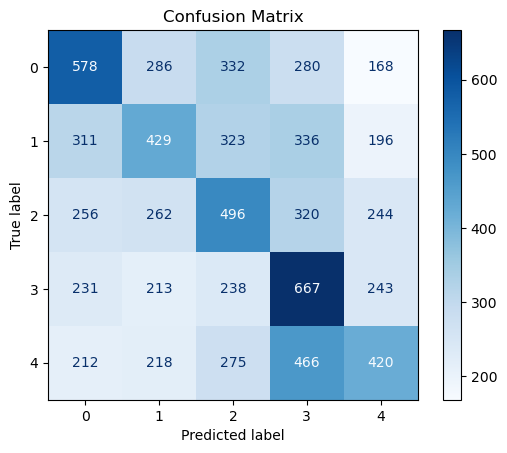

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_val, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Adding the accuracies of different channel types to an array so that we can later create a plot comparing these accuracy results.

In [41]:
# This path should always point to the folder where you hold your numpy array dataset
data_directory = r"C:\Users\erkme\OneDrive\Masaüstü\bitirme_proje_kodlar\data"

os.makedirs(data_directory, exist_ok=True)
accuracy_file_path = os.path.join(data_directory, "tgnF_HighSNR.npy") # Give second parameter the name of the subfolder which results in getting accuracy result for the desired channel type.

# Load existing accuracies if the file exists, otherwise create a new array
if os.path.exists(accuracy_file_path):
    accuracies = np.load(accuracy_file_path)
else:
    accuracies = np.array([])

# Append the new accuracy to the array
accuracies = np.append(accuracies, accuracy)

# Save the updated accuracies array back to the file
np.save(accuracy_file_path, accuracies)

print(f"Accuracies saved to: {accuracy_file_path}")
print(f"Accuracies array: {accuracies}")

Accuracies saved to: C:\Users\erkme\OneDrive\Masaüstü\bitirme_proje_kodlar\data\tgnF_HighSNR.npy
Accuracies array: [0.4835   0.41675  0.423625 0.541875 0.32375  0.32375 ]


The following parts were added to adjust the accuracy list. They can be removed, as they might not be needed in future applications.

In [43]:
# Step 1: Switch the first and last element
# accuracies[0], accuracies[-1] = accuracies[-1], accuracies[0]
# print(accuracies)

[0.32375  0.41675  0.423625 0.541875 0.4835  ]


In [44]:
# Step 2: Erase the last element
# accuracies = accuracies[:-1]

# print(accuracies)

[0.32375  0.41675  0.423625 0.541875]


In [47]:
# print(accuracies)

[0.32375  0.41675  0.423625 0.541875]


Following part plots the SNR (Signal-to-Noise-Ratio) accuracies of only one channel type

In [30]:
#Plotting the SNR graph

accuracies_sorted = np.sort(accuracies)
plot = False # If you want to observe the plot simply assign True to plot variable

dat = np.load(accuracy_file_path) # Give file path of your accuracies list
snr_levels = ["0","2.5","5","7.5","10","12.5","15","17.5","20"] # used as axis label in plot

if plot == True:

    # Set the figure size

    plt.figure(figsize=(12, 10))  # Adjust width and height as needed


    plt.plot(snr_levels, accuracies_sorted, marker='o', linestyle='-')
    plt.title("Accuracy vs SNR")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Accuracy")
    plt.grid(True)

    # Annotate each point with its corresponding SNR value
    for snr, acc in zip(snr_levels, accuracies_sorted):
        plt.annotate(f"{acc:.3f}", (snr, acc), textcoords="offset points", xytext=(0,10), ha='center')

    plt.show()

Following sets necessary arrays for plotting the SNR (Signal-to-Noise-Ratio) accuracies of different channel types

In [45]:
data_directory = r"C:\Users\erkme\OneDrive\Masaüstü\bitirme_proje_kodlar\data"

os.makedirs(data_directory, exist_ok=True)
acc = os.path.join(data_directory, "accuracies.npy")
accuracyA_file_path = os.path.join(data_directory, "tgnA_acc.npy")
accuracyD_file_path = os.path.join(data_directory, "tgnD_acc.npy")
accuracyF_file_path = os.path.join(data_directory, "tgnF_acc.npy")
accuracyHighSNR_file_path = os.path.join(data_directory, "tgnF_HighSNR.npy")

snr_acc = np.load(acc)
dat_A = np.load(accuracyA_file_path)
dat_D = np.load(accuracyD_file_path)
dat_F = np.load(accuracyF_file_path)
dat_HighSNR = np.load(accuracyHighSNR_file_path)
snr_levels_2 = ["5", "10", "15", "20"]  # To print out low level snr vs accuracies results
snr_levels_3 = ["30", "40", "50", "60"] # To print out high level snr vs accuracies results
print(snr_acc)
print(dat_A)
print(dat_D)
print(dat_F)
print(dat_HighSNR)

[0.997125 0.98775  0.939    0.853    0.752    0.6455   0.543375 0.463
 0.39375  0.998   ]
[0.983125 0.876125 0.659375 0.4925  ]
[0.725875 0.625125 0.528125 0.40975 ]
[0.36175  0.322625 0.404625 0.35575  0.408   ]
[0.4835   0.41675  0.423625 0.541875 0.32375  0.32375 ]


The following parts were added to adjust the accuracy list. They can be removed, as they might not be needed in future applications.

In [32]:
# data_directory = r"C:\Users\erkme\OneDrive\Masaüstü\bitirme_proje_kodlar\data"

# os.makedirs(data_directory, exist_ok=True)
# accuracy_file_path = os.path.join(data_directory, "accuracies.npy")
# # Load existing accuracies if the file exists, otherwise create a new array
# if os.path.exists(accuracy_file_path):
#     accuracies = np.load(accuracy_file_path)
# else:
#     accuracies = np.array([])

# accuracies = accuracies[:-1]

# accuracies_sorted = np.sort(accuracies)
# print(accuracies_sorted)


In [33]:
# Extracting specific elements
selected_values = accuracies_sorted[[2, 4, 6, 8]]

# # Display the selected values
print("Original array:", accuracies_sorted)
print("Selected values:", selected_values)

In [34]:
# print("Original array:", dat_F)

# # Remove the last component
# dat_F = dat_F[:-1]
# print("Modified array:", dat_F)

In [35]:
# dat_F = dat_F[::-1]

In [36]:
accuracies_A_sorted = np.sort(dat_A)
accuracies_D_sorted = np.sort(dat_D)
accuracies_F_sorted = np.sort(dat_F)
accuracies_HighSNR_sorted = np.sort(dat_HighSNR)

Plot the SNR vs Accuracies graph of different channel types

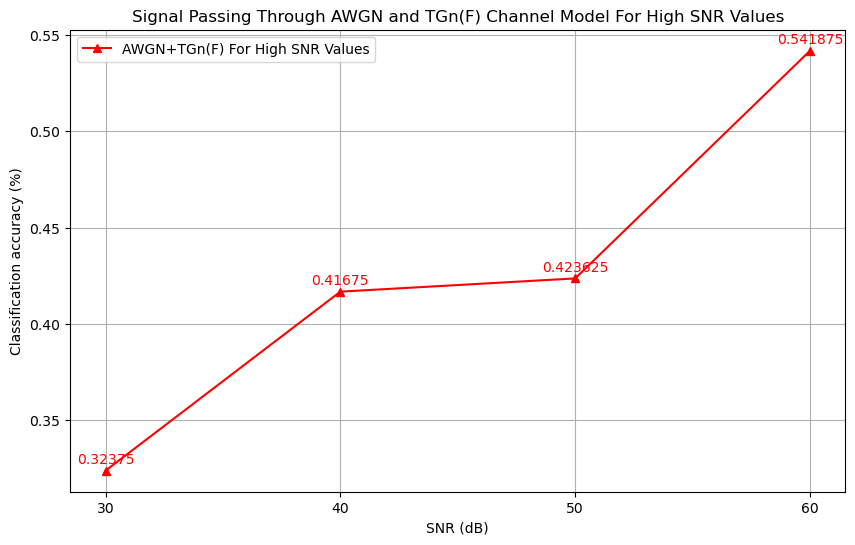

In [50]:
#Plotting the SNR vs Accuracies graph

#Plotting
plt.figure(figsize=(10, 6))
plt.plot(snr_levels_2, selected_values, marker='x', label='Only AWGN', color='purple')
plt.plot(snr_levels_2, accuracies_A_sorted, marker='o', label='AWGN+TGn_A', color='blue')
plt.plot(snr_levels_2, accuracies_D_sorted, marker='s', label='AWGN+TGn_D', color='green')
plt.plot(snr_levels_2, dat_F, marker='^', label='AWGN+TGn_F', color='red')
#plt.plot(snr_levels_3, accuracies, marker='^', label='AWGN+TGn(F) For High SNR Values', color='red')

# Annotate data points
for i, (x, y) in enumerate(zip(snr_levels_2, selected_values)):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='purple')
for i, (x, y) in enumerate(zip(snr_levels_2, accuracies_A_sorted)):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
for i, (x, y) in enumerate(zip(snr_levels_2, accuracies_D_sorted)):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='green')
for i, (x, y) in enumerate(zip(snr_levels_2, dat_F)):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='red')

# for i, (x, y) in enumerate(zip(snr_levels_3, accuracies)):
#     plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='red')

# Adding titles and labels
plt.title('Signal Passing Through AWGN and TGn(F) Channel Model For High SNR Values')
plt.xlabel('SNR (dB)')
plt.ylabel('Classification accuracy (%)')

# Adding legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()